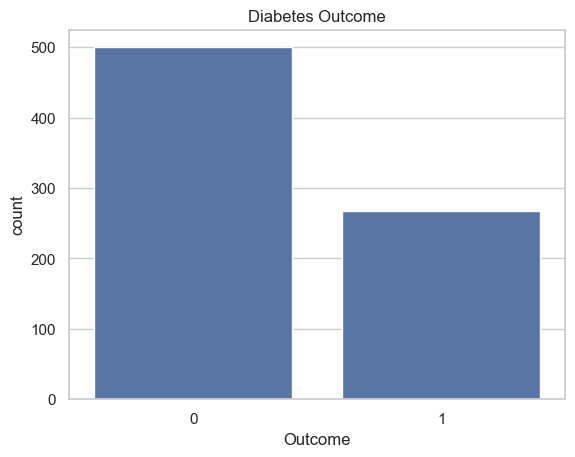

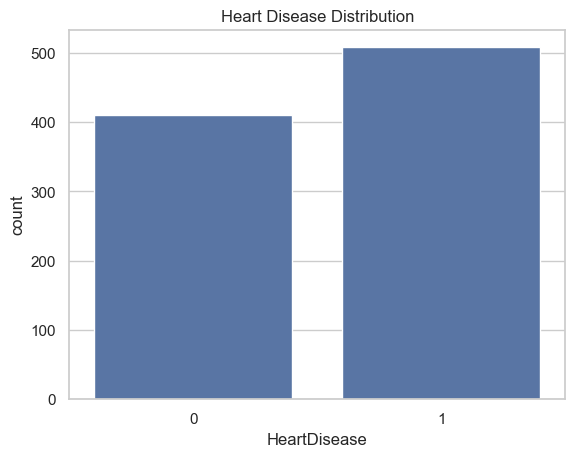

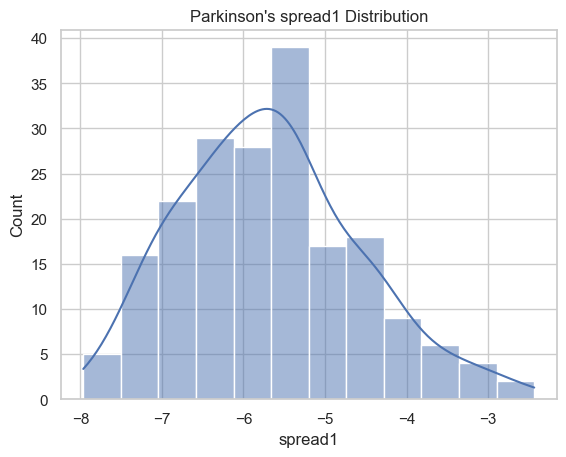


📊 Diabetes - Random Forest
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



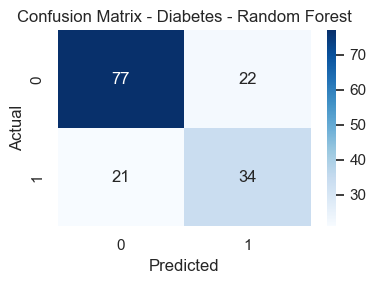

C:\Users\mayan\AppData\Local\Temp\ipykernel_10416\2020974777.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette='viridis')


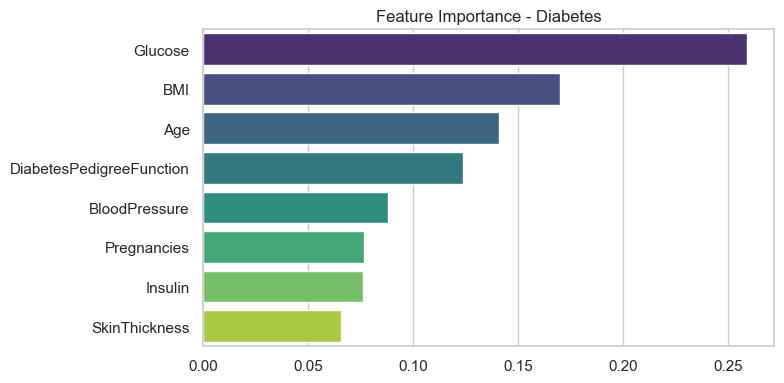


📊 Diabetes - KNN
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



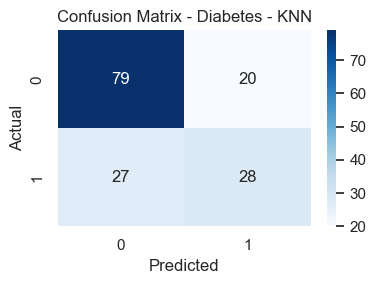


📊 Heart Disease - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       508

    accuracy                           1.00       918
   macro avg       1.00      1.00      1.00       918
weighted avg       1.00      1.00      1.00       918



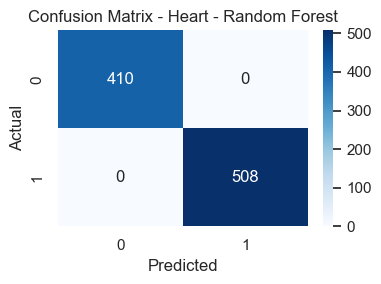

C:\Users\mayan\AppData\Local\Temp\ipykernel_10416\2020974777.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette='viridis')


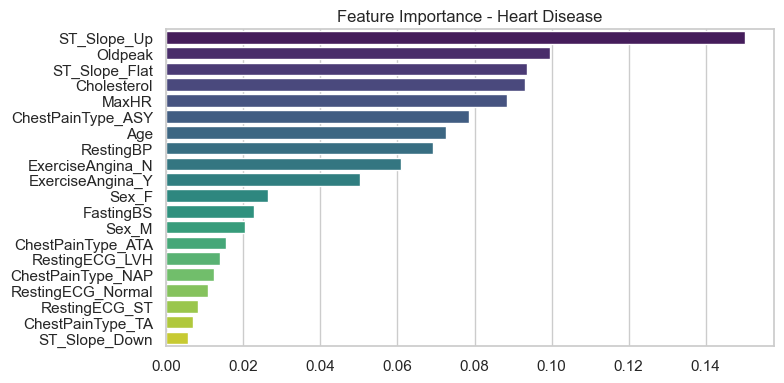


📊 Heart Disease - KNN
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       410
           1       0.89      0.93      0.91       508

    accuracy                           0.89       918
   macro avg       0.90      0.89      0.89       918
weighted avg       0.89      0.89      0.89       918



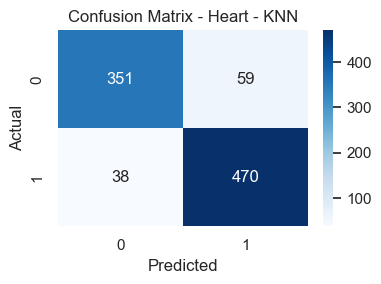


📊 Parkinson’s - Random Forest
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



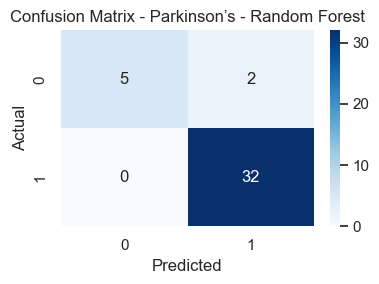

C:\Users\mayan\AppData\Local\Temp\ipykernel_10416\2020974777.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette='viridis')


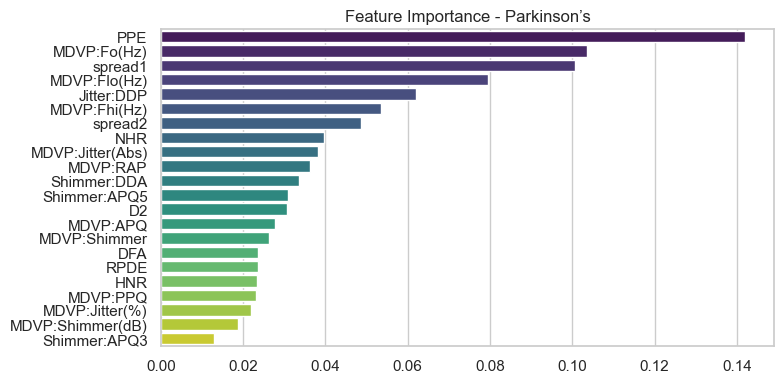


📊 Parkinson’s - KNN
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



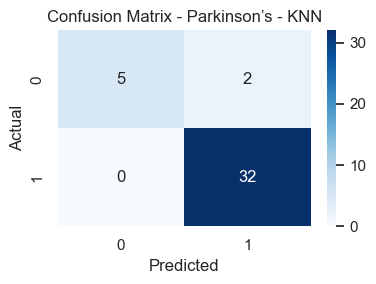


📌 Final Outcome Summary:
     Category         Model  Accuracy
Heart Disease Random Forest  1.000000
  Parkinson’s Random Forest  0.948718
  Parkinson’s           KNN  0.948718
Heart Disease           KNN  0.894336
     Diabetes Random Forest  0.720779
     Diabetes           KNN  0.694805


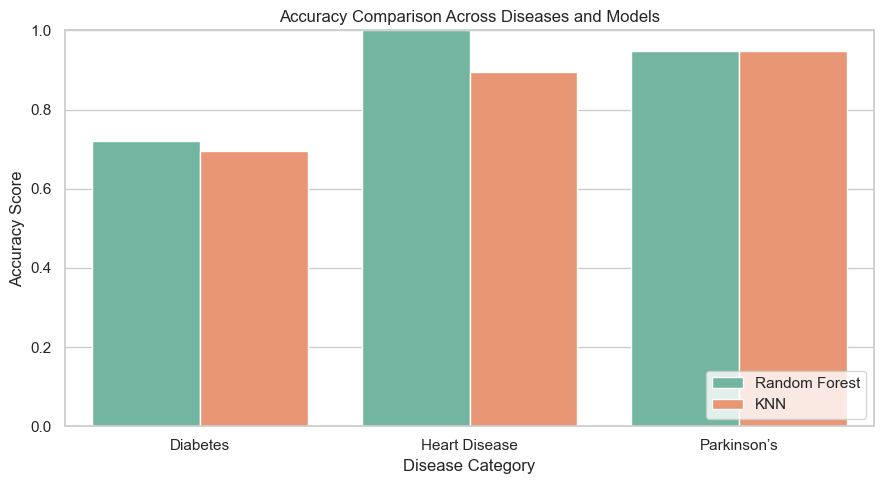


🎯 Diabetes Prediction: Negative
🎯 Heart Prediction: Positive
🎯 Parkinson’s Prediction: Positive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set(style="whitegrid")

# Load datasets
diabetes = pd.read_csv("diabetes.csv")
heart = pd.read_csv("heart.csv")
parkinsons = pd.read_csv("parkinsons.csv")

# Outcome Distribution Plots
sns.countplot(x='Outcome', data=diabetes)
plt.title("Diabetes Outcome")
plt.show()

sns.countplot(x='HeartDisease', data=heart)
plt.title("Heart Disease Distribution")
plt.show()

sns.histplot(parkinsons['spread1'], kde=True)
plt.title("Parkinson's spread1 Distribution")
plt.show()

# Utility Functions
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {title}")
    plt.tight_layout()
    plt.show()

def plot_feature_importance(model, feature_names, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(8, 4))
    sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette='viridis')
    plt.title(f'Feature Importance - {title}')
    plt.tight_layout()
    plt.show()

outcome_summary = []

# ------------------ DIABETES ------------------ #
X_d = diabetes.drop('Outcome', axis=1)
y_d = diabetes['Outcome']
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.2, random_state=42)

pipe_d = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])
pipe_d.fit(X_train_d, y_train_d)
rf_pred_d = pipe_d.predict(X_test_d)
acc_rf_d = accuracy_score(y_test_d, rf_pred_d)
print("\n📊 Diabetes - Random Forest")
print(classification_report(y_test_d, rf_pred_d))
plot_conf_matrix(y_test_d, rf_pred_d, "Diabetes - Random Forest")
plot_feature_importance(pipe_d.named_steps['model'], X_d.columns, "Diabetes")

pipe_d_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=5))
])
pipe_d_knn.fit(X_train_d, y_train_d)
knn_pred_d = pipe_d_knn.predict(X_test_d)
acc_knn_d = accuracy_score(y_test_d, knn_pred_d)
print("\n📊 Diabetes - KNN")
print(classification_report(y_test_d, knn_pred_d))
plot_conf_matrix(y_test_d, knn_pred_d, "Diabetes - KNN")

outcome_summary.append(("Diabetes", "Random Forest", acc_rf_d))
outcome_summary.append(("Diabetes", "KNN", acc_knn_d))

# ------------------ HEART DISEASE ------------------ #
X_h = heart.drop('HeartDisease', axis=1)
y_h = heart['HeartDisease']
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
num_cols = [col for col in X_h.columns if col not in cat_cols]

preprocessor_h = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

pipe_h = Pipeline([
    ('pre', preprocessor_h),
    ('model', RandomForestClassifier(random_state=42))
])
pipe_h.fit(X_h, y_h)
rf_pred_h = pipe_h.predict(X_h)
acc_rf_h = accuracy_score(y_h, rf_pred_h)
print("\n📊 Heart Disease - Random Forest")
print(classification_report(y_h, rf_pred_h))
plot_conf_matrix(y_h, rf_pred_h, "Heart - Random Forest")

# Feature importance
encoded_cols = pipe_h.named_steps['pre'].named_transformers_['cat'].get_feature_names_out(cat_cols)
all_features_h = np.concatenate([num_cols, encoded_cols])
plot_feature_importance(pipe_h.named_steps['model'], all_features_h, "Heart Disease")

pipe_h_knn = Pipeline([
    ('pre', preprocessor_h),
    ('model', KNeighborsClassifier(n_neighbors=5))
])
pipe_h_knn.fit(X_h, y_h)
knn_pred_h = pipe_h_knn.predict(X_h)
acc_knn_h = accuracy_score(y_h, knn_pred_h)
print("\n📊 Heart Disease - KNN")
print(classification_report(y_h, knn_pred_h))
plot_conf_matrix(y_h, knn_pred_h, "Heart - KNN")

outcome_summary.append(("Heart Disease", "Random Forest", acc_rf_h))
outcome_summary.append(("Heart Disease", "KNN", acc_knn_h))

# ------------------ PARKINSON’S ------------------ #
X_p = parkinsons.drop(['name', 'status'], axis=1)
y_p = parkinsons['status']
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.2, random_state=42)

pipe_p = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])
pipe_p.fit(X_train_p, y_train_p)
rf_pred_p = pipe_p.predict(X_test_p)
acc_rf_p = accuracy_score(y_test_p, rf_pred_p)
print("\n📊 Parkinson’s - Random Forest")
print(classification_report(y_test_p, rf_pred_p))
plot_conf_matrix(y_test_p, rf_pred_p, "Parkinson’s - Random Forest")
plot_feature_importance(pipe_p.named_steps['model'], X_p.columns, "Parkinson’s")

pipe_p_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=5))
])
pipe_p_knn.fit(X_train_p, y_train_p)
knn_pred_p = pipe_p_knn.predict(X_test_p)
acc_knn_p = accuracy_score(y_test_p, knn_pred_p)
print("\n📊 Parkinson’s - KNN")
print(classification_report(y_test_p, knn_pred_p))
plot_conf_matrix(y_test_p, knn_pred_p, "Parkinson’s - KNN")

outcome_summary.append(("Parkinson’s", "Random Forest", acc_rf_p))
outcome_summary.append(("Parkinson’s", "KNN", acc_knn_p))

# ------------------ FINAL OUTCOME SUMMARY ------------------ #
outcome_df = pd.DataFrame(outcome_summary, columns=["Category", "Model", "Accuracy"])
print("\n📌 Final Outcome Summary:")
print(outcome_df.sort_values(by="Accuracy", ascending=False).to_string(index=False))

# Plot Summary
plt.figure(figsize=(9, 5))
sns.barplot(data=outcome_df, x="Category", y="Accuracy", hue="Model", palette="Set2")
plt.title("Accuracy Comparison Across Diseases and Models")
plt.ylim(0, 1)
plt.ylabel("Accuracy Score")
plt.xlabel("Disease Category")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# ------------------ SAMPLE PREDICTIONS ------------------ #
samp_d = pd.DataFrame([[5,116,74,0,0,25.6,0.201,30]], columns=X_d.columns)
print("\n🎯 Diabetes Prediction:", "Positive" if pipe_d.predict(samp_d)[0] else "Negative")

samp_h = pd.DataFrame([{'Age':63, 'Sex':'M', 'ChestPainType':'ATA','RestingBP':145,'Cholesterol':233,
                        'FastingBS':1,'RestingECG':'Normal','MaxHR':150,'ExerciseAngina':'N',
                        'Oldpeak':2.3,'ST_Slope':'Flat'}])
print("🎯 Heart Prediction:", "Positive" if pipe_h.predict(samp_h)[0] else "Negative")

samp_p = pd.DataFrame([[119.99,157.3,74.99,0.00784,0.00007,0.0037,0.0055,0.011,0.0437,0.426,
                        0.0218,0.0313,0.0297,0.0654,0.0221,21.03,0.4147,0.815,-4.813,0.266,
                        2.301,0.284]], columns=X_p.columns)
print("🎯 Parkinson’s Prediction:", "Positive" if pipe_p.predict(samp_p)[0] else "Negative")